In [1]:
from utils import *
from external_packages import *

In [2]:
final_stackset=pd.read_csv(processed_data_folder+'/final_stackset_PowerTransformer.csv',index_col=0)
final_stackset_features=final_stackset.drop(['ID','to_predict'],axis=1)
final_stackset_target=final_stackset.loc[:,['to_predict']]
final_stackset_target.groupby('to_predict')['to_predict'].count()

to_predict
0    999756
1       244
Name: to_predict, dtype: int64

In [3]:
X_train, X_test, y_train, y_test=train_test_split(final_stackset_features,final_stackset_target,
                        test_size=0.2,stratify=final_stackset_target,random_state =random_state )

In [4]:
pca = PCA(n_components=45)
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.transform(X_test)

RUNS=under_sampling.RandomUnderSampler(random_state=random_state)
X_train_under,y_train_under=RUNS.fit_resample(X_train_pca,y_train)

ROVS=over_sampling.RandomOverSampler(random_state=random_state)
X_train_over,y_train_over=ROVS.fit_resample(X_train_pca,y_train)


In [5]:
train_test_splits=[
                [X_train,y_train,X_test,y_test],
                [X_train_pca,y_train,X_test_pca,y_test],
                [X_train_under,y_train_under,X_test_pca,y_test],
                [X_train_over,y_train_over,X_test_pca,y_test],
                ]

In [10]:
modeling=experiment()
modeling.train_test_splits=train_test_splits

In [11]:
ETC=ExtraTreesClassifier(class_weight='balanced',random_state=random_state,min_weight_fraction_leaf=0.026842105263157893)
modeling.run_model(ETC)

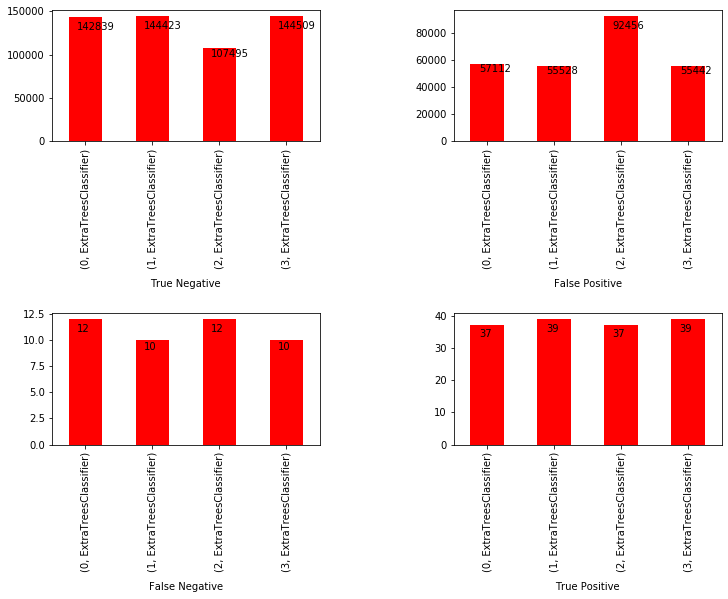

In [12]:
modeling.plot_comp(cmap_name='autumn',figsize=(12,8),)